<h1 style="color:DodgerBlue;">Read in EC lab, pressure, and EPR; Import files as list</h1>

In [11]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import *

from matplotlib import rcParams as rc
rc['mathtext.default'] = 'regular'


-2.3911389251541264
o2 consumed: 37.84838793537355
o2 evolved: 34.440437592268125
0.909957846846092
-2.6767244106062655
o2 consumed: 33.43860273161067
o2 evolved: 27.08141137973938
0.8098846592695209


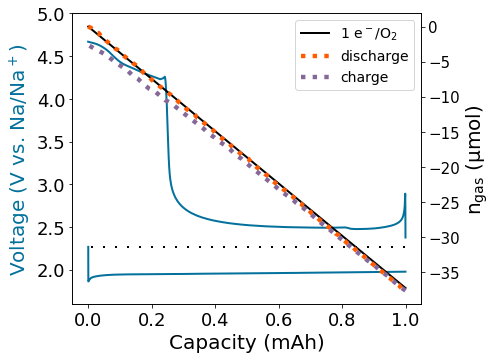

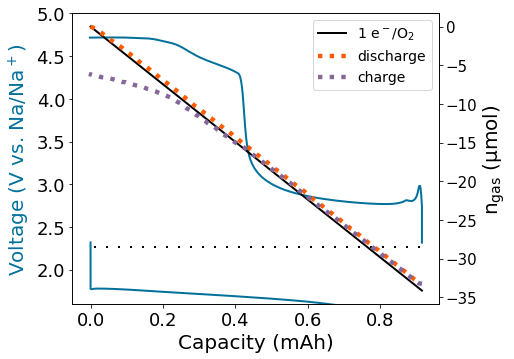

In [12]:

#function that passes in a dataframe for discharge and charge and plots voltage vs capacity
def plot_cp(disch, chrg, press, channel, style=None, n=None, leg=''):
    color= 'xkcd:ocean blue'
    n=1
#     color='#045a8d'
#     color='xkcd:cerulean'
    #find currents for charge and discharge and //normalize by area
    disc_i= np.mean(disch['I/mA']) #/(np.pi*0.6**2)
    chrg_i= np.mean(chrg['I/mA']) #/(np.pi*0.6**2)
    
    #find the final capacity reached on discharge in mAh
    cap=disch['Capacity/mA.h'].iloc[-1]
    if style ==None:
        style = 'solid'
        
    x1=disch['Capacity/mA.h'] #/(np.pi*0.6**2)
    y1=disch['Ewe/V']
    
    x2=(cap-chrg['Capacity/mA.h']) #/(np.pi*0.6**2)
    y2=chrg['Ewe/V']
    

    #fig, (ax, ax3)= plt.subplots(2, sharex=True, figsize= (9,10)) 
    #fig, ax= plt.subplots( figsize=(8.275,5))
    fig, ax= plt.subplots( figsize=(7,5))
    ax2 = ax.twinx()
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='y', which='major', labelsize=15)
            
    ax.plot(x1, y1, c=color, linestyle=style, label=leg, linewidth=2)
    ax.plot(x2, y2, c=color, linestyle=style, label='', linewidth=2)
    ax.plot([0.01,cap],[2.27,2.27], c='k', linestyle=(0,(1,5)), linewidth=2)
    
    st1=disch['time/s'].iloc[0]
    end1=disch['time/s'].iloc[-1]
    
    st2=chrg['time/s'].iloc[0]
    end2=chrg['time/s'].iloc[-1]
    
    #determine start and end indices in pressure df for discharge and charge
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    temp = press['temperature/C']+273
    umoles = press['pressure/torr']/760*headspace(channel)/temp/0.082057
    umoles = umoles-umoles.iloc[st_p1]
    elec_oxy= x1.iloc[-1]*3.6/96485/umoles[end_p1]
    
    x=[0,cap] #/(np.pi*0.6**2)]
    y=[0,-cap*3.6/n/96485*10**6]
    
    disch_cap=(press['time/s']-press['time/s'].iloc[st_p1])*-disc_i/3600
    char_cap=cap -(press['time/s']-press['time/s'].iloc[st_p2])*chrg_i/3600 #divide cap by/(np.pi*.6**2)

    gap= umoles[end_p1]-umoles[st_p2]
    print((disch_cap.iloc[-1]*3.6/96485/(umoles[end_p1]*10**(-6))))
    line1, = ax2.plot(x, y, 'k-' , label= str(n)+' e$^-$/O$_2$',linewidth= 2) #linestyle = (0,(5,10))
    ax2.plot(disch_cap[st_p1:end_p1+1], (umoles)[st_p1:end_p1+1], color='xkcd:bright orange', label='discharge', linewidth=4.4, linestyle = ':')# (0,(6,6))) # color '#9E0003' '#ec7014'
    ax2.plot(char_cap[st_p2:end_p2+1], (umoles)[st_p2:end_p2+1]+gap, color='xkcd:dark lavender', label='charge', linewidth=4.4,  linestyle =':')# (0,(6,6)))
    
    print("o2 consumed: "+ str(umoles[st_p1]-(umoles[end_p1+1] )))
    print("o2 evolved: "+ str(umoles[end_p2]-(umoles[st_p2+1] )))
    print((umoles[end_p2]-(umoles[st_p2+1]))/(umoles[st_p1]-(umoles[end_p1+1])))

    ax2.legend(fontsize=14)
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', color=color, fontsize=20)
    ax.set_xlabel('Capacity (mAh)', fontsize=20)
    ax2.set_ylabel('n$_{gas}$ ($\mu$mol)', fontsize=20)
    plt.tight_layout()
    ax.set_ylim([1.6,5])
    
    return 
#xcslow= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190110_Na_slowdischarge_010mA_xc72/')
#xcp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190110_Na_slowdischarge_010mA_xc72/190110_Na_slowdischarge_010mA_xc72_p_Ch5__2019-01-10_14.32_13.txt')
#plot_cp(xcslow[1], xcslow[3], xcp, 5, 'b')

naCP= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell2/')
nap= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell2/180910_Na_cycling_chronopotentiometry_cell2_cycle1_Ch4__2018-09-10_13.00_33.txt')
#plot_cp(naCP[3], naCP[5], nap, 3)
#plt.savefig('/Users/kedzie/Desktop/qual figures/Na cp cell cycle for manuscript_v2.png', transparent = True, dpi=600, bbox_inches='tight')

nacp2= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180915_Na_cycling_chronopotentiometry_cell1/')
nacp2_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180915_Na_cycling_chronopotentiometry_cell1/180915_Na_cycling_chronopotentiometry_cell1_cycle1_Ch3__2018-09-15_14.49_26.txt')
plot_cp(nacp2[3], nacp2[5], nacp2_p, 3)

graphitecp=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190403_Na_MCMBgraphite_CP_slow/')
gcpp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190403_Na_MCMBgraphite_CP_slow/190403_Na_MCMBgraphite_CP_slow_Ch4__2019-04-03_09.44_38.txt')
plot_cp(graphitecp[1], graphitecp[3], gcpp, 4)

#plt.savefig('/Users/kedzie/Desktop/qual figures/mcmb graphite cp cell.png', transparent = True, dpi=600, bbox_inches='tight')

#code to plot first slide generic Li-air and Na-air cycling profiles

# #li_cycle= folder_files('/Users/kedzie/Downloads/180524-1,0MLiTFSI-DME_XC72-comLFP-DEMS_500_250uAcm2/')

# fig, ax= plt.subplots( figsize=(6,5))
# #ax.tick_params(axis='both', which='major', labelsize=16)
# ax.set_ylabel('Voltage (V vs. Li/Li$^+$)', color='xkcd:ocean blue', fontsize=22)
# ax.set_xlabel('Capacity (mAh)', fontsize=22)
# j=1500
# end1=li_cycle[5]['Capacity/mA.h'].iloc[-1]
# ax.plot(1-li_cycle[1]['Capacity/mA.h'][:j]/end1, li_cycle[1]['Ewe/V'][:j]+3.4, c='xkcd:ocean blue', linewidth=3)
# ax.plot(li_cycle[5]['Capacity/mA.h']/end1, li_cycle[5]['Ewe/V']+3.4, c='xkcd:ocean blue', linewidth=3)
# ax.plot([0.01,1],[2.96,2.96], c='k', linestyle=(0,(1,5)),  linewidth=3)
# ax.set_xlim(-0.05,1.05)
# ax.tick_params(axis='both', which='major', labelsize=18)
# #plt.savefig('/Users/kedzie/Desktop/qual figures/generic lithium cycle_kristians data.png', transparent=True, dpi=600, bbox_inches='tight')


# fig, ax3= plt.subplots( figsize=(6,5))
# #ax.tick_params(axis='both', which='major', labelsize=16)
# ax3.set_ylabel('Voltage (V vs. Na/Na$^+$)', color='xkcd:ocean blue', fontsize=22)
# ax3.set_xlabel('Capacity (mAh)', fontsize=22)
# ax3.plot(naCP[3]['Capacity/mA.h'][:j], naCP[3]['Ewe/V'][:j], c='xkcd:ocean blue', linewidth=3)
# ax3.plot(1-naCP[5]['Capacity/mA.h'], naCP[5]['Ewe/V'], c='xkcd:ocean blue', linewidth=3)
# ax3.plot([0.01,1],[2.27,2.27], c='k', linestyle=(0,(1,5)), linewidth=3)
# ax3.set_xlim(-0.05,1.05)
# ax3.tick_params(axis='both', which='major', labelsize=18)
# #plt.savefig('/Users/kedzie/Desktop/qual figures/generic sodium cycle_slide1.png', transparent= True, dpi=600, bbox_inches='tight')



o2 consumed: 37.05004866800189
o2 evolved: 33.13265296406985
0.8942674613187408
o2 consumed: 36.17020741939527
o2 evolved: 33.466523832645805
0.9252510897877879
o2 consumed: 35.27467122066135
o2 evolved: 32.81555407629439
0.9302866034105916
o2 consumed: 34.95471580002747
o2 evolved: 31.78097168329252
0.909204121844628
o2 consumed: 39.37294708428941
o2 evolved: 33.77049678211979
0.8577081291330335
o2 consumed: 33.43860273161067
o2 evolved: 27.08141137973938
0.8098846592695209


-6.240801009341794

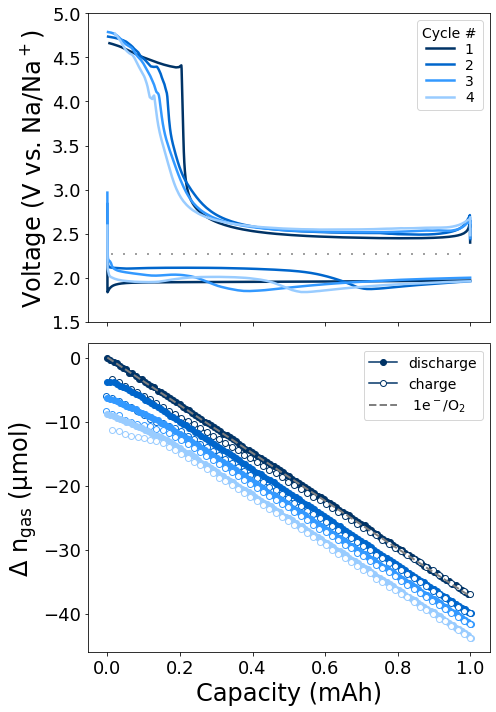

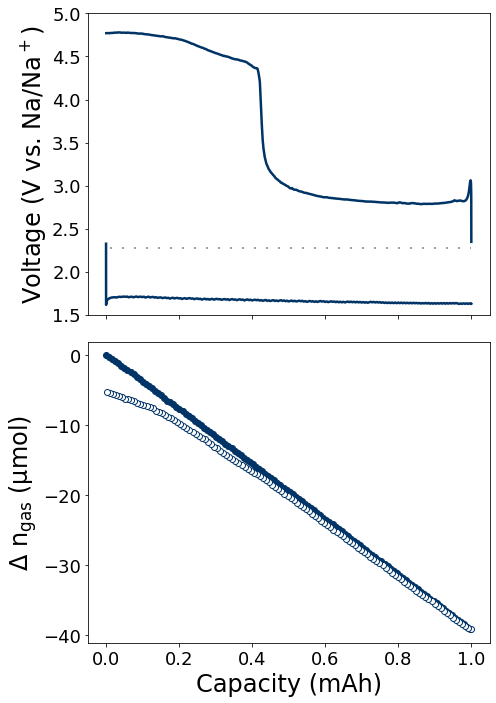

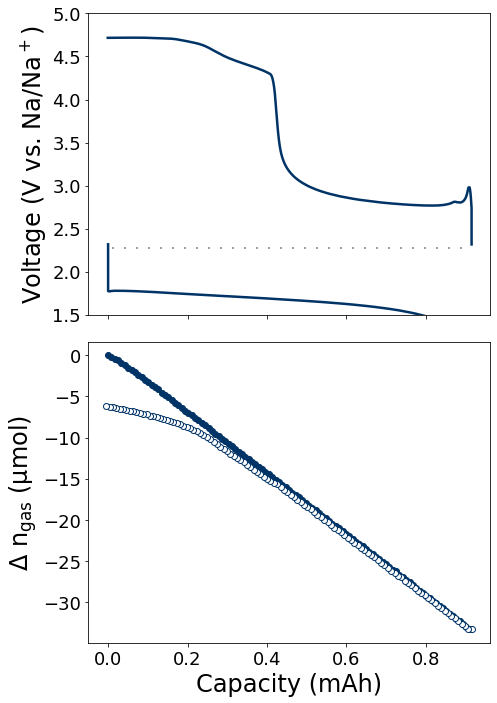

In [20]:
def plot_cycling(disch, chrg, press, channel, cyclenum, n=None, offset=0, eline=False):
    i=cyclenum
    colors=['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
    n=1
    disc_i= np.mean(disch['I/mA']) #/(np.pi*0.6**2)
    chrg_i= np.mean(chrg['I/mA']) #/(np.pi*0.6**2)
    
    #find the final capacity reached on discharge in mAh
    cap=disch['Capacity/mA.h'].iloc[-1]

    x1=disch['Capacity/mA.h'] #/(np.pi*0.6**2)
    y1=disch['Ewe/V']
    x2=(cap-chrg['Capacity/mA.h']) #/(np.pi*0.6**2)
    y2=chrg['Ewe/V']
    
    endindex=-1
    if (i==4):
        endindex=202
    else:
        endindex=-1        
    ax.plot(x1, y1, c=colors[i], linestyle='-', linewidth=2.5, label = str(i))
    ax.plot(x2[:endindex], y2[:endindex], c=colors[i], linestyle='-', label='', linewidth=2.5)
    ax.plot([0.01,cap],[2.27,2.27], c='#A0A0A0', linestyle=(0,(1,5)), linewidth=2)
    
    st1=disch['time/s'].iloc[0]
    end1=disch['time/s'].iloc[-1]
    
    st2=chrg['time/s'].iloc[0]
    end2=chrg['time/s'].iloc[-1]
    
    #determine start and end indices in pressure df for discharge and charge
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    temp = press['temperature/C']+273
    umoles = press['pressure/torr']/760*headspace(channel)/temp/0.082057
    umoles = umoles-umoles.iloc[st_p1]
    elec_oxy= x1.iloc[-1]*3.6/96485/umoles[end_p1]
    
    disch_cap=(press['time/s']-press['time/s'].iloc[st_p1])*-disc_i/3600
    char_cap=cap -(press['time/s']-press['time/s'].iloc[st_p2])*chrg_i/3600 #divide cap by/(np.pi*.6**2)

    gap= umoles[end_p1]-umoles[st_p2]

    x=[0,cap] #/(np.pi*0.6**2)]
    y=[0-offset,-cap*3.6/n/96485*10**6-offset]
    
    ax2.plot(disch_cap[st_p1:end_p1+1], (umoles)[st_p1:end_p1+1]+offset, 'o-', color= colors[i], linewidth=1.5, markersize=6, label='')
    ax2.plot(char_cap[st_p2:(end_p2+1)], (umoles)[st_p2:(end_p2+1)]+gap+offset, 'o-', color=colors[i], linewidth=1.5, markersize=6, mfc='white', label='')
    if eline==True:
        ax2.plot(x, y,  c='grey', linestyle='--', label= '',linewidth= 2)

    print("o2 consumed: "+ str(umoles[st_p1]-(umoles[end_p1+1] )))
    print("o2 evolved: "+ str(umoles[end_p2]-(umoles[st_p2+1] )))
    print((umoles[end_p2]-(umoles[st_p2+1]))/(umoles[st_p1]-(umoles[end_p1+1])))

    ax.tick_params(axis='both', which='major', labelsize=18); ax2.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24); ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24); plt.tight_layout()
    ax.set_ylim([1.5,5])
    
    return ( umoles[end_p2-1]+gap )

cp1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle1_Ch3__2018-09-10_13.00_13.txt')
cp1_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/')

cp2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle2_Ch3__2018-09-10_17.40_12.txt')
cp3 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle3_Ch3__2018-09-10_21.36_59.txt')
cp4 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle4_Ch3__2018-09-11_08.44_02.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
o1=plot_cycling(cp1_ec[3],cp1_ec[5], cp1, 3, 1, eline=True)
o2=plot_cycling(cp1_ec[10],cp1_ec[12], cp2, 3, 2, offset=o1)
o3=plot_cycling(cp1_ec[17],cp1_ec[19], cp3, 3, 3, offset=o1+o2)
plot_cycling(cp1_ec[24],cp1_ec[27], cp4, 3, 4, offset=o1+o2+o3)

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge', ' 1e$^-$/O$_2$' ], fontsize=14)
#plt.savefig('/Users/kedzie/Desktop/180910_Na_p50 cp cycling.pdf', transparent= True, dpi=600, bbox_inches='tight')


fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
lowerbinder_p =read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CP/200114_10%binder_MCMB1202_cycling_CP_cycle1_Ch4__2020-01-14_17.58_33.txt')
lowerbinder_mcmb_CP = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CP/')
plot_cycling(lowerbinder_mcmb_CP[1],lowerbinder_mcmb_CP[3], lowerbinder_p, 4, 1, offset=0)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CP/200114 MCMB CP cycling.png', transparent= True, dpi=600, bbox_inches='tight')


regularmcmbp=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190403_Na_MCMBgraphite_CP_slow/190403_Na_MCMBgraphite_CP_slow_Ch4__2019-04-03_09.44_38.txt')
regular= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190403_Na_MCMBgraphite_CP_slow/')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

plot_cycling(regular[1],regular[3], regularmcmbp, 4, 1, offset=0)



In [4]:
cap50_2=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/180814_maybecycle2.txt')
cap50_1=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/180814_Na_lowercurrents_cell2_cycle1_p_Ch5__2018-08-14_11.12_09.txt')
cap50_3=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/180814_Na_lowercurrents_cell2_cycle3_p_Ch5__2018-08-15_09.47_35.txt')
cap50_4=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/1808174_cycle4_pressure.txt')

plt.figure()
#plt.plot(cap50_1['time/s'], cap50_1['pressure/torr'])
#plt.plot(cap50_2['time/s']+2000, cap50_2['pressure/torr'])
plt.plot(cap50_3['time/s'], cap50_3['pressure/torr'])
plt.plot(cap50_4['time/s']+15300, cap50_4['pressure/torr'])



NameError: name 'read_press' is not defined

In [5]:
## fastdisch_norest = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190802_Na_CP_fastdischarge_norest_charge/')
fastdisch_norest_p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190802_Na_CP_fastdischarge_norest_charge/190802_Na_CP_fastdischarge_norest_charge_p_Ch1__2019-08-02_11.57_33.txt')
   
plot_cp(fastdisch_norest[1],fastdisch_norest[2],fastdisch_norest_p, 1)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190802_Na_CP_fastdischarge_norest_charge/fast discharge no rest.png', transparent = True, dpi=600, bbox_inches='tight')



longocv= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190802_Na_CP_fastdischarge_4hoursOCV_charge/190802_Na_CP_fastdischarge_4hoursOCV_charge/')
longocv_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190802_Na_CP_fastdischarge_4hoursOCV_charge/190802_Na_CP_fastdischarge_4hoursOCV_charge/190802_Na_CP_fastdischarge_4hoursOCV_charge_p_Ch4__2019-08-02_12.02_15.txt')
plot_cp(longocv[1],longocv[3],longocv_p, 4)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190802_Na_CP_fastdischarge_4hoursOCV_charge/fast discharge 4 hours rest.png', transparent = True, dpi=600, bbox_inches='tight')
plt.figure(figsize=(8,6))


plt.plot(fastdisch_norest[1]['Capacity/mA.h'],fastdisch_norest[1]['Ewe/V'], 'xkcd:ocean blue' , label= 'no rest between disch/chrg' , linewidth=2.5)
plt.plot(0.2-fastdisch_norest[2]['Capacity/mA.h'],fastdisch_norest[2]['Ewe/V'], 'xkcd:ocean blue' , label= '' ,linewidth=2.5 )


plt.plot(longocv[1]['Capacity/mA.h'],longocv[1]['Ewe/V'], '--', color='xkcd:burnt orange' , label= '4 hours OCV between disch/chrg' ,linewidth=2.5  )
plt.plot(0.2-longocv[3]['Capacity/mA.h'],longocv[3]['Ewe/V'], '--', color='xkcd:burnt orange' , label= '' , linewidth=2.5 )

plt.legend(fontsize=14)
plt.ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=20)
plt.xlabel('Capacity (mAh)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
#plt.savefig('/Users/kedzie/Desktop/qual figures/fast discharge 4 hours rest comparison.png', transparent = True, dpi=600, bbox_inches='tight')


    

NameError: name 'read_press' is not defined

In [6]:


pred_cp= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190701_Na_Pred_CP_test/')
pred_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190701_Na_Pred_CP_test/190701_Na_Pred_CP_test_Ch5__2019-07-01_13.08_46.txt')
plot_cp(pred_cp[1], pred_cp[3], pred_p, 5)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190701_Na_Pred_CP_test/Pred CP cycle.png', transparent = True, dpi=600, bbox_inches='tight')



sup_cp=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190701_Na_Superior_CP_test/')
sup_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190701_Na_Superior_CP_test/190701_Na_superior_CP_test_Ch4__2019-07-01_13.07_55.txt')
plot_cp(sup_cp[1], sup_cp[3], sup_p, 4)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190701_Na_Superior_CP_test/Superior_CP cycle.png', transparent = True, dpi=600, bbox_inches='tight')


li_mcmb= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190711_Li_MCMB_CPcycle/')
li_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190711_Li_MCMB_CPcycle/190711_Li_MCMB_CP_p_Ch5__2019-07-11_14.32_17.txt')
plot_cp(li_mcmb[1], li_mcmb[3], li_p, 5)

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190711_Li_MCMB_CPcycle/Li cp with MCMB cathode.png', transparent = True, dpi=600, bbox_inches='tight')

ballmillcp= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190723_Na_ballmilledMCMB_CP/')
ballmillpress= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190723_Na_ballmilledMCMB_CP/190723_Na_ballmilledMCMB_CP_press_Ch4__2019-07-23_12.56_47.txt')
plot_cp(ballmillcp[3], ballmillcp[5], ballmillpress, 4)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190723_Na_ballmilledMCMB_CP/Ball milled MCMB cathode CP.png', transparent = True, dpi=600, bbox_inches='tight')



NameError: name 'folder_files' is not defined

In [7]:
cmcCP= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190624_Na_MCMB_CMCSBR_CP/')
cmc_p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190624_Na_MCMB_CMCSBR_CP/190624_Na_MCMB_CMCSBR_CP_p_Ch4__2019-06-24_14.36_35.txt')

plot_cp(cmcCP[1], cmcCP[3], cmc_p, 4, 'b')

plt.figure()
plt.plot(cmcCP[1]['Capacity/mA.h'], cmcCP[1]['Ewe/V'], 'xkcd:cerulean')
plt.plot(cmcCP[1]['Capacity/mA.h'].iloc[-1]-cmcCP[3]['Capacity/mA.h'], cmcCP[3]['Ewe/V'], 'xkcd:cerulean')
plt.ylim(4.5, 4.6)

NameError: name 'folder_files' is not defined

In [8]:
#this function will import the EC_lab file and convert it to a dataframe starting at the line after the n lines of header

def read_epr(file):
    
    filed = open(file)
    line = next(filed)
    count=0
    while not 'INTENSITY' in line:
        line = next(filed)
        count=count+1
    
    df = pd.read_csv(file, sep = '\t', skiprows=count )
    #df.columns.values[1] = 'field/mT' 
    #df.columns.values[2] = 'intensity' 
    #df.rename(columns={'FIELD (mT)': 'field/mT', 'INTENSITY': 'intensity'})
    
    return (df)


#determine number of cycles in a data file
def num_cycles(df): 
    cycle = int(df['cycle number'].iloc[-1])     #gets last cycle number in the column   
    return (cycle)

def headspace(num_ch):
    def channel_vol(ch):
        if ch==1:
            channel_vol=1656.5
        elif ch==2:
            channel_vol=1676.5
        elif ch==3:
            channel_vol=1669.4
        elif ch==4:
            channel_vol=1640.6
        elif ch==5:
            channel_vol=1671.8
        elif ch=='dems1':
            channel_vol=1284 #+499
        elif ch== 'dems2':
            channel_vol=1292+499
        return (channel_vol)
    
    cell_vol = 422.5
    elyte = 80 
    headspace = channel_vol(num_ch) + cell_vol - elyte   #in uL
    
    return headspace

def titration(v_hcl, v_thio, capacity, cell_kind=None):
    #number of electrons per electron transfer
    
    if cell_kind == 'Na' or 'na':
        n=1
    if cell_kind==None:
        n=2
    
    o2_theor = capacity*3.6/n/96485*10**6
    
    #concentrations in molarity
    conc_hcl = 0.01191             #value as of 6/5/18 
    conc_thio = 0.009876
    
    #this calc is for sodium, check stoich for Li
    o2_acid= v_hcl * conc_hcl *10**3/n
    o2_iodo = v_thio * conc_thio *10**3/n
    
    yield1=o2_acid/o2_theor*100
    yield2= o2_iodo/o2_theor*100

    print(repr(o2_acid) + ' umoles NaO2 by acid base titration: ' + str(yield1) +'%')
    print(repr(o2_iodo) + ' umoles NaO2 by iodometric titration: ' + str(yield2)+'%')
    print(str(o2_theor) + ' theoretical umoles NaO2')
    
    return (o2_acid, o2_iodo)

def wheniscurrent(pressure):
    val = pressure['current/mA'].iloc[-1] #should be ~3.4mA at OCV
    lis=[]
    for i in range(len(pressure)):
        if pressure['current/mA'].iloc[i]!=val:
            if pressure['current/mA'].iloc[i-1] == val:
                lis.append(i)
            elif pressure['current/mA'].iloc[i+1]==val:
                lis.append(i)

    return( lis)
# ----------------------- PLOT EPR SCRIPT --------------------------

#good script>>>>>>>>
# import scipy.integrate as integrate

# tdpa0 = read_epr('/Users/kedzie/Documents/Berkeley/Research/Data/EPR/180424_25mMTDPA_LiNO3_LiTFSI_DME_4 __180424_163556.ESR')
# #tdpasolid= read_epr('/Users/kedzie/Documents/Berkeley/Research/Data/EPR/180420_TDPAsolid_4Trial2__180420_143753.ESR')
# tdpa2= read_epr('/Users/kedzie/Documents/Berkeley/Research/Data/EPR/180424_25mMTDPA_LiNO3_LiTFSI_DME_2 __180424_154727.ESR')
# tdpa3 = read_epr('/Users/kedzie/Documents/Berkeley/Research/Data/EPR/180424_25mMTDPA_LiNO3_LiTFSI_DME_3 __180424_160708.ESR')
# tdpa11=read_epr('/Users/kedzie/Documents/Berkeley/Research/Data/EPR/180424_25mMTDPA_LiNO3_LiTFSI_DME_1 __180424_153926.ESR')
# tdpa_init=read_epr('/Users/kedzie/Documents/Berkeley/Research/Data/EPR/180420_25mMTDPALiNO3LiTFSI_DME_5Trial2 __180420_151530.ESR')


# plt.figure()

# plt.plot(71.4484*9.684/tdpa11['G-FACTOR'], tdpa11['INTENSITY'], label= '1')
# plt.plot(tdpa2['FIELD (mT)'], tdpa2['INTENSITY'], label= '2')
# plt.plot(tdpa3['FIELD (mT)'], tdpa3['INTENSITY'], label= '3')
# plt.plot((tdpa0['FIELD (mT)']),tdpa0['INTENSITY'], label= '4')
# plt.plot(tdpa_init['FIELD (G)']/10,tdpa_init['INTENSITY'], label= 'initial')

# plt.xlabel('Field(mT)')
# plt.ylabel('Intensity')
# plt.legend(loc=1)

# good script ^^^^

#plt.savefig('/Users/kedzie/Desktop/epr tdpa different conditions.png', transparent = True, dpi=600, bbox_inches='tight')

#tdpa1 = read_epr('/Users/kedzie/Documents/Berkeley/Research/Data/EPR/180420_25mMTDPALiNO3LiTFSI_DME_5Trial1 __180420_151355.ESR')
#plt.figure()
#plt.plot((tdpa1['field/G']/10)[4200:5500],tdpa1['intensity'][4200:5500])
#plt.xlabel('Field (mT)')
#plt.ylabel('Intensity')
#plt.savefig('/Users/kedzie/Desktop/epr half charge tdpa.png', transparent = True, dpi=600, bbox_inches='tight')


# --------------------  INTEGRATION of Peaks  ---------------#
#y= integrate.simps(tdpa0['INTENSITY'][4650:5300], (tdpa0['FIELD (G)']/10)[4650:5300], even='avg')
#print(y)

#y2= integrate.simps(tdpa1['INTENSITY'][4800:5300], (tdpa1['FIELD (G)']/10)[4800:5300], even='avg')
#print(y2)


na_thiant1 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180605_thianthrene_Na_discharge_titration1/')
na_p1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180605_thianthrene_Na_discharge_titration1/180605_thianthrene_Na_discharge_titration1_Ch4__2018-06-05_12.33_00.txt')

na_thiant2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180605_thianthrene_Na_discharge_titration2/')
na_p2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180605_thianthrene_Na_discharge_titration2/180605_thianthrene_Na_discharge_titration2_Ch5__2018-06-05_12.33_15.txt')


plt.plot(na_thiant1[1]['Capacity/mA.h'], na_thiant1[1]['Ewe/V'], label='cell 1')
plt.plot(na_thiant2[2]['Capacity/mA.h'], na_thiant2[2]['Ewe/V'], label='cell 2')
plt.xlabel('Capacity (mAh)')
plt.ylabel('Potential (V vs. Na/Na$^+$)')
plt.legend()


print(na_thiant1[1]['Capacity/mA.h'].iloc[-1])
print(na_thiant2[2]['Capacity/mA.h'].iloc[-1])

titration(1.00, .49, na_thiant2[2]['Capacity/mA.h'].iloc[-1], 'na')
titration(1.51, .58, na_thiant1[1]['Capacity/mA.h'].iloc[-1], 'na')

na_charg=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180531_thianthrene_Na_charge_underAr/')

# plt.figure()
# plt.plot(na_charg[2]['Capacity/mA.h'], na_charg[2]['Ewe/V'])
# plt.xlabel('Capacity (mAh)')
# plt.ylabel('Potential (V)')



NameError: name 'folder_files' is not defined

In [9]:
#xiaoli's data

na_ion = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190222_Naion_Cover20_xiaoli_cell1/')
ion_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190222_Naion_Cover20_xiaoli_cell1/190222_Naion_c20_xiaoli_cell1_p_Ch5__2019-02-22_11.40_26.txt')

plt.figure()
#plt.plot(na_ion[0]['Ns changes'],na_ion[0]['<I>/mA'], "o" )

temp = ion_p['temperature/C']+273
umoles = ion_p['pressure/torr']/760*headspace(5)/temp/0.082057
#umoles = umoles-umoles.iloc[20]
chrg_st= na_ion[0]['Ns']
select = list(np.where(na_ion[0]["Ns"] == 1)[0])

#switch= na_ion.index[na_ion['Ns']==1][0]
charge=6879
discharge=6969
p1=getnearpos(ion_p['time/s'], select[0])
p2= getnearpos(ion_p['time/s'], na_ion[0]['time/s'].iloc[charge])

endcap= na_ion[0]['Capacity/mA.h'].iloc[charge]/.00888
fig, ax= plt.subplots( figsize= (9,10)) 
ax2=ax.twinx()


ax.plot((na_ion[0]['Capacity/mA.h']/.00888), na_ion[0]['Ewe/V'], color='xkcd:orange')
ax.plot((na_ion[0]['Capacity/mA.h']/.00888)[discharge:], na_ion[0]['Ewe/V'][discharge:], color='xkcd:orange')

ax.set_xlabel("Capacity (mAh/g)")
ax.set_ylabel("Potential (V vs. Na$^+$/Na$^0$)")
ax2.set_ylabel('Moles of Gas (umoles)')


p1=20
p2=940
p3= 970
p4=2112
ax2.plot((ion_p['time/s']/3600*10)[p1:p2], umoles[p1:p2], color='xkcd:cerulean')
print(ion_p['time/s'].iloc[p2]/3600)
print(ion_p['time/s'].iloc[p3]/3600)
print(ion_p['time/s'].iloc[p4]/3600)
#ax2.plot((ion_p['time/s']/3600*0.0888/0.00888)[p3:], umoles[p3:], color='xkcd:grey')
#plt.savefig('/Users/kedzie/Desktop/Na ion c_20 rate.png', transparent = True, dpi=600, bbox_inches='tight')


na_ion = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190309_naIon_xiaoli_c20_dems/cell1/')
ion_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190222_Naion_Cover20_xiaoli_cell1/190222_Naion_c20_xiaoli_cell1_p_Ch5__2019-02-22_11.40_26.txt')

temp = ion_p['temperature/C']+273
umoles = ion_p['pressure/torr']/760*headspace(5)/temp/0.082057
#umoles = umoles-umoles.iloc[20]

#switch= na_ion.index[na_ion['Ns']==1][0]


endcap= na_ion[1]['Capacity/mA.h'].iloc[-1]/.01184
fig, ax= plt.subplots( figsize= (9,10)) 
ax2=ax.twinx()


ax.plot((na_ion[1]['Capacity/mA.h']/.01184), na_ion[1]['Ewe/V'], color='xkcd:orange')
ax.plot((na_ion[3]['Capacity/mA.h']/.01184), na_ion[3]['Ewe/V'], color='xkcd:orange')

ax.set_xlabel("Capacity (mAh/g)")
ax.set_ylabel("Potential (V vs. Na$^+$/Na$^0$)")
ax2.set_ylabel('Moles of Gas (umoles)')

#ax2.plot((ion_p['time/s']/3600*10)[p1:p2], umoles[p1:p2], color='xkcd:cerulean')
#plt.savefig('/Users/kedzie/Desktop/Na ion c_20 dems.png', transparent = True, dpi=600, bbox_inches='tight')



NameError: name 'folder_files' is not defined

In [10]:
cp_4cycle = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/')

fig, ax= plt.subplots( figsize=(9,5))
#ax2=ax.twinx()    
plot_cp(cp_4cycle[3], cp_4cycle[5], pressure, 4, 'b', leg='cycle 1')
plot_cp(cp_4cycle[10], cp_4cycle[12], pressure, 4, 'green', leg='cycle 2')
plot_cp(cp_4cycle[17], cp_4cycle[19], pressure, 4, 'orange', leg='cycle 3')
plot_cp(cp_4cycle[24], cp_4cycle[26], pressure, 4, 'red', leg='cycle 4')
#plt.savefig('/Users/kedzie/Desktop/Na cycling CP.png', transparent = True, dpi=600, bbox_inches='tight')



NameError: name 'folder_files' is not defined

0.1895810454842163


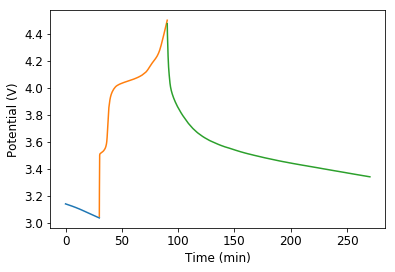

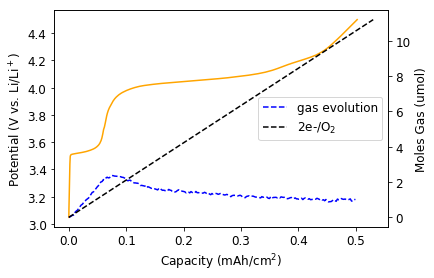

In [54]:
import pylab
lino2=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180604_0.1MLiNO2_charge_Ar/')
pressure= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180604_0.1MLiNO2_charge_Ar/180604_0.1MLiNO2_charge_Ar_Ch4__2018-06-04_15.59_29.txt')
channel=4

plt.plot(lino2[0]['time/s']/60, lino2[0]['Ewe/V'])
plt.plot(lino2[1]['time/s']/60, lino2[1]['Ewe/V'])
plt.plot(lino2[2]['time/s']/60, lino2[2]['Ewe/V'])
plt.xlabel('Time (min)')
plt.ylabel('Potential (V)')
#plt.savefig('/Users/kedzie/Desktop/lino2 discharge under ar.png', transparent = True, dpi=600, bbox_inches='tight')

cp=lino2[1]
    
#find currents for charge and discharge and normalize by area
chrg_i= np.mean(cp['I/mA'])/(np.pi*0.6**2)

#find the final capacity reached on discharge in mAh
end=cp['Capacity/mA.h'].iloc[-1]

x1=cp['Capacity/mA.h']/(np.pi*0.6**2)
y1=cp['Ewe/V']

fig, ax= plt.subplots()

ax.plot(x1, y1, c='orange', label='potential')

ax.set_xlabel('Capacity (mAh/cm$^2$)')
ax.set_ylabel('Potential (V vs. Li/Li$^+$)')

ax2 = ax.twinx()
ax2.set_ylabel('Moles Gas (umol)')

st1=cp['time/s'].iloc[0]
end1=cp['time/s'].iloc[-1]

st_p1 = getnearpos(pressure['time/s'],st1)
end_p1 = getnearpos(pressure['time/s'],end1)


temp = pressure['temperature/C']+273
umoles = pressure['pressure/torr']/760*headspace(channel)/temp/0.082057
umoles = umoles-umoles.iloc[st_p1]
elec_oxy= x1.iloc[-1]*3.6/96485/umoles[end_p1]

x=[0,0.6/(np.pi*.6**2)]
y=[0,0.6*3.6/2/96485*10**6]

disch_cap=(pressure['time/s']-pressure['time/s'].iloc[st_p1])*chrg_i/3600
#char_cap=1-(-press['time/s'].iloc[st_p2]+press['time/s'])*chrg_i/3600


ax2.plot(disch_cap[st_p1:end_p1], umoles[st_p1:end_p1], color='blue', linestyle='dashed', label='gas evolution' )

#ax2.plot(char_cap[st_p2:end_p2], (-umoles+umoles.iloc[st_p2])[st_p2:end_p2], color=color, linestyle='dashed' , label=leg)

ax2.plot(x,y, 'k--', linewidth=1.5, label='2e-/O$_2$')
ax2.legend(loc=7)
#plt.savefig('/Users/kedzie/Desktop/lino2 charge ar.png', transparent = True, dpi=600, bbox_inches='tight')
print(.1*80*10**(-6)*96485/3.6/(np.pi*0.6**2))


<h1 style="color:DodgerBlue;">Plot Discharge/Charge Profiles and CVs</h1>

In [11]:



#function that passes in a dataframe for discharge and charge and plots voltage vs capacity
def disch_chrg(cp, press, channel, color, leg, style=None):
    
    #find the index of the point where the discharge switches to charge
    switch= cp.index[cp['Ns changes']==1][0]
    
    #find currents for charge and discharge and normalize by area
    disc_i= np.mean(cp['I/mA'][:switch]) #/(np.pi*0.6**2)
    chrg_i= np.mean(cp['I/mA'][switch:]) #/(np.pi*0.6**2)
    
    #find the final capacity reached on discharge in mAh
    cap=cp['Capacity/mA.h'][switch-1]
    if style ==None:
        style = 'solid'
        
    x1=cp['Capacity/mA.h'][:switch] #/(np.pi*0.6**2)
    y1=cp['Ewe/V'][:switch]
    
    x2=(cap-cp['Capacity/mA.h'][switch:]) #/(np.pi*0.6**2)
    y2=cp['Ewe/V'][switch:]
    
    fig, ax= plt.subplots()
    
    ax.plot(x1, y1, c=color, linestyle=style, label=leg)
    ax.plot(x2, y2, c=color, linestyle=style, label='')
    
    ax.set_xlabel('Capacity (mAh)')
    ax.set_ylabel('Potential (V vs. Li/Li$^+$)')
    
    ax2 = ax.twinx()
    ax2.set_ylabel('Moles Gas ($\mu$mol)')
    ax2.set_xlabel('Capacity (mAh)')
    st1=cp['time/s'].iloc[0]
    end1=cp['time/s'].iloc[switch]
    
    st2=cp['time/s'].iloc[switch]
    end2=cp['time/s'].iloc[-1]
    #determine start and end indices in pressure df for discharge and charge
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    temp = press['temperature/C']+273
    umoles = press['pressure/torr']/760*headspace(channel)/temp/0.082057
    umoles = umoles-umoles.iloc[st_p1]
    elec_oxy= x1.iloc[-1]*3.6/96485/umoles[end_p1]
    
    x=[0,cap] #/(np.pi*0.6**2)]
    y=[0,-cap*3.6/2/96485*10**6]
    
    #x=[0,1.5]
    #y=[3.6*chrg_i/60/(2*96485)*10**6,3.6*chrg_i/60/(2*96485)*10**6]
    #z=[-3.6*chrg_i/60/(2*96485)*10**6, -3.6*chrg_i/60/(2*96485)*10**6]
    #timediff= np.mean(np.gradient(press['time/s']))/60
    #new=np.gradient(umoles, timediff)
    
    disch_cap=(press['time/s']-press['time/s'].iloc[st_p1])*-disc_i/3600
    char_cap=cap -(press['time/s']-press['time/s'].iloc[st_p2])*chrg_i/3600 #divide cap by/(np.pi*.6**2)
    
    print((disch_cap.iloc[-1]*3.6/96485/(umoles[end_p1]*10**(-6))))
    ax2.plot(disch_cap[st_p1:end_p1], (umoles)[st_p1:end_p1], '--', color='purple', markersize=1 ,label='' )
    ax2.plot(char_cap[st_p2:end_p2], (umoles)[st_p2:end_p2], '--', color='purple' , label='')
    ax2.plot(x,y,'k--')
    #ax2.plot(char_cap[st_p2:end_p2], (-umoles+umoles.iloc[st_p2])[st_p2:end_p2], color=color, linestyle='dashed' , label=leg)
    #ax2.legend()
    
    return   

#takes in a list of cv dataframes and plots them with legends

def plot_cv(cv_list, scan_list):
    
    #color=['xkcd:dark aqua','xkcd:mint','xkcd:brick','xkcd:tangerine']
    plt.figure()
    for i in range(len(cv_list)):
        cycle = num_cycles(cv_list[i])
        plt.plot(cv_list[i]['Ewe/V'], cv_list[i]['<I>/mA'], label=scan_list[i])
        plt.xlabel('Potential (V vs. Li/Li$^+$)')
        plt.ylabel('Current (mA)')
        #for j in range(1, cycle+1):
#              #plt.figure()
             #df = cv_list[i].iloc[np.isclose(cv_list[i]['cycle number'], j)]
            
             #ax = plt.gca()      
#             #color= color[j-1]
             #ax.plot(df['Ewe/V'], df['<I>/mA'], color='xkcd:cerulean')  #label = 'Cycle #{}'.format(j))
#             ax.set(xlabel='Voltage (V)', ylabel='Current (mA)')
            
    #ax=plt.gca()   
    plt.legend()
    return
lino2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180528_0.1MLiNO2_disch_chrg/')
li_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180528_0.1MLiNO2_disch_chrg/180528_0.1MLiNO2_disch_chrg_Ch5__2018-05-28_15.36_41.txt')



#plt.savefig('/Users/kedzie/Desktop/lino2 cycle.png', transparent = True, dpi=600, bbox_inches='tight')


#------------------------------------------
tdpa=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180317_TDPA_1.5mAh_5mA/')
tdpa_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180317_TDPA_1.5mAh_5mA/180317_TDPA_1.5mAh_5mA_p_Ch1.txt')    

ttf=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180317_TTF_1.5mAh_5mA/')
ttf_p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180317_TTF_1.5mAh_5mA/180317_TTF_1.5mAh_5mA_p_Ch2.txt')    

control =folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180322_Li_0.5MLiNO3_1.5mAh_5mA/')
control_p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180322_Li_0.5MLiNO3_1.5mAh_5mA/180322_Li_0.5MLiNO3_1.5mAh_5mA_p_Ch1.txt')    



#ax2 = ax.twinx()
#ax2.set_ylabel('Moles Gas (umol)')
x=[0,1.5] #/(np.pi*0.6**2)]
y=[0,-1.5*3.6/2/96485*10**6]

#fig, ax= plt.subplots()
 
# disch_chrg(tdpa[1],tdpa_p, 1, 'xkcd:green', '25mM TDPA')
# disch_chrg(ttf[1],ttf_p, 2, 'orange', '10mM TTF')
# disch_chrg(control[1],control_p, 1, 'xkcd:azure', 'no RM')
#ax2.plot(x,y, 'k--', linewidth=1.5, label='2e-/O$_2$')
#ax2.legend()
#plt.savefig('/Users/kedzie/Desktop/no3 cont cycle .png', transparent = True, dpi=600, bbox_inches='tight')



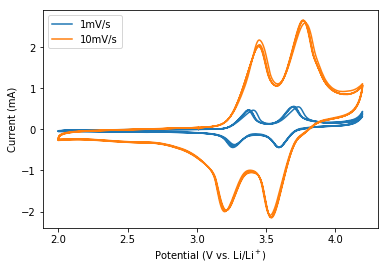

In [34]:
tdpa_dmso = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180724_TDPA_LiNO3_DMSO_CV/')



plot_cv([tdpa_dmso[1],tdpa_dmso[3]], ['1mV/s', '10mV/s'])

#plt.savefig('/Users/kedzie/Desktop/tdpa dmso no3 cv.png', transparent = True, dpi=600, bbox_inches='tight')

Text(0,0.5,'I (mA)')

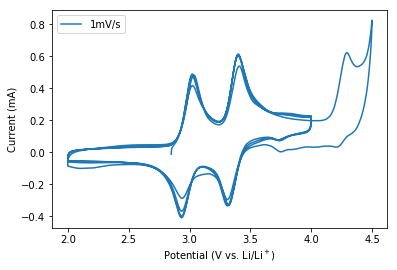

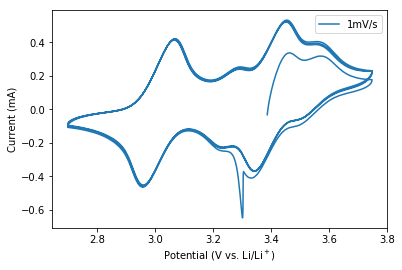

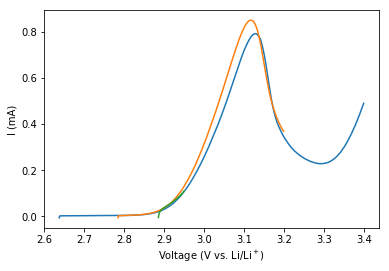

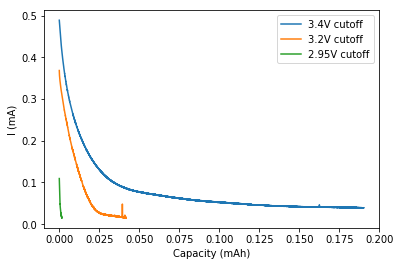

In [35]:

tdpanono3= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180612_tdpa_noNO3_CV_Ar/')
plot_cv([tdpanono3[1]], ['1mV/s'])
#plt.savefig('/Users/kedzie/Desktop/tdpa no no3.png', transparent = True, dpi=600, bbox_inches='tight')

tdpacv= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180425_TDPA_CV_2.7_4/')
plot_cv([tdpacv[3]], ['1mV/s'])
#plt.savefig('/Users/kedzie/Desktop/tdpa cv no3.png', transparent = True, dpi=600, bbox_inches='tight')

oxidation=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180521_TDPA_LSV_CA_3.4/')
oxy2 =folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180521_TDPA_LSV_CA_3.2/')
oxy3= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180517_TDPA_LSV_CA_2.95/')

plt.figure(facecolor='white')
plt.plot(oxidation[1]['Ewe/V'],oxidation[1]['<I>/mA'])
plt.plot(oxy2[1]['Ewe/V'], oxy2[1]['<I>/mA'] )
plt.plot(oxy3[1]['Ewe/V'], oxy3[1]['<I>/mA'] )

plt.xlabel('Voltage (V vs. Li/Li$^+$)')
plt.ylabel( 'I (mA)')
#plt.savefig('/Users/kedzie/Desktop/tdpa oxidation lsv ca2.png', transparent = True, dpi=600, bbox_inches='tight')

plt.figure(facecolor='white')
plt.plot(oxidation[2]['Capacity/mA.h'], oxidation[2]['I/mA'], label='3.4V cutoff')
plt.plot(oxy2[2]['Capacity/mA.h'], oxy2[2]['I/mA'], label='3.2V cutoff')
plt.plot(oxy3[2]['Capacity/mA.h'], oxy3[2]['I/mA'], label='2.95V cutoff')
plt.legend()
plt.xlabel('Capacity (mAh)')
plt.ylabel( 'I (mA)')

#plt.savefig('/Users/kedzie/Desktop/tdpa oxidation lsv ca.png', transparent = True, dpi=600, bbox_inches='tight')





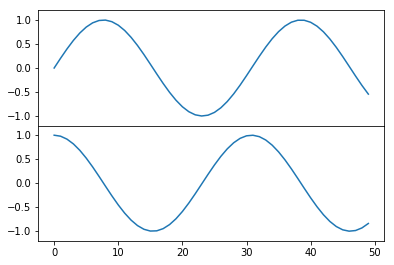

In [36]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));



so28=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_2.8V_cell1/')
so28_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_2.8V_cell1/180621_Na_CA_2.8V_cell1_p_Ch3__2018-06-21_11.20_27.txt')

li= wheniscurrent(so28_p)


TypeError: list indices must be integers or slices, not str

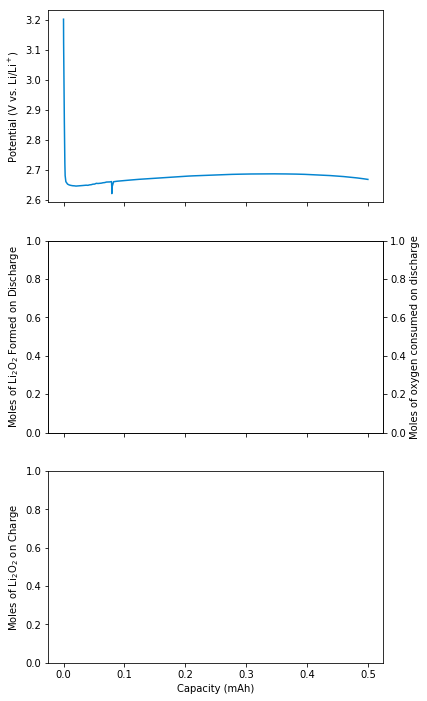

In [37]:
def plot_titrations(discharge, charge, press, channel):
    titration=[[0,0.1,0.2,0.3,0.4], [0,2,4,6,8]]
    charge= [[0.25, 0.5, 0.25, 0.2, 0.1, 1], [24.8976, 16.375, 24.515, 27.100, 30.5474, 0]]
    
    endcap= discharge['Capacity/mA.h'].iloc[-1]
    fig, (ax, ax2, ax4)=plt.subplots(3, sharex=True, figsize= (6,12))
    ax3 = ax2.twinx()
    ax.set_ylabel('Potential (V vs. Li/Li$^+$)')
    ax4.set_xlabel('Capacity (mAh)')
    ax2.set_ylabel('Moles of Li$_2$O$_2$ Formed on Discharge')
    ax3.set_ylabel('Moles of oxygen consumed on discharge')
    ax4.set_ylabel('Moles of Li$_2$O$_2$ on Charge ')
    ax.plot(discharge['Capacity/mA.h'], discharge['Ewe/V'], 'xkcd:cerulean')
    
    start = [discharge['time/s'].iloc[0]]
    end = [discharge['time/s'].iloc[-1]]
    
    cap = 0
    for i in range(len(charge)):
        ax.plot( (endcap-cap-charge[i]['Capacity/mA.h']), charge[i]['Ewe/V'], 'xkcd:cerulean')
        cap = charge[i]['Capacity/mA.h'].iloc[-1] + cap
        start.append(charge[i]['time/s'].iloc[0])
        end.append(charge[i]['time/s'].iloc[-1])
    p_start, p_end = [], []
    
    for i in range(len(start)):
        p_start.append(getnearpos(press['time/s'], start[i]))
        p_end.append(getnearpos(press['time/s'], end[i]))
    print(p_start, p_end)
    temp = press['temperature/C']+273
    umoles = np.divide(press['pressure/torr'], temp)/760*headspace(channel)/0.082057
    umoles = umoles-umoles[p_start[0]]
    x1=[0,endcap]
    y1=[0,endcap*3.6/2/96485*10**6]
    
    ax3.plot( (press['time/s'][p_start[0]:p_end[0]]-press['time/s'][p_start[0]])/3600*0.5, -umoles[p_start[0]:p_end[0]] , 'm--', label='oxygen consumption')
    ax3.plot(x1,y1, 'k', label= '2e$^-$ / O$_2$')
    ax3.legend()
    ax3.plot(titration[0], titration[1], 'o')
    ax4.plot(endcap-(press['time/s'][p_start[1]:p_end[1]]-press['time/s'][p_start[1]])/3600*0.5, umoles[p_start[1]:p_end[1]]-umoles[p_start[1]] )
    
    
    return

titration2tfsi= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180625_LiTFSI_3.8V_titration2/')
tfp3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180625_LiTFSI_3.8V_titration2/180625_LiTFSI_3.8V_titration2_p_Ch1_leakcorrected.txt')

plot_titrations(titration2tfsi[1], [titration2tfsi[3], titration2tfsi[4]], tfp3,1)

na_press= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell1/180823_Na_cycling_chronoamp_cell1_cycle1_p_Ch3__2018-08-23_14.51_46.txt')
natitration= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell1/')
plot_titrations(natitration[3], natitration[6], natitration[7], natitration[8], na_press, 3)

In [ ]:
def plot_li_CA(discharge, cp1, ca, press, ch, c, cap0=None, leg=None):
    #press['time/s'] = press['time/s'] #normalize times
    
    n=2 #set number e- per process
    i_dis= -1*np.mean(discharge['I/mA']) #find currents
    i_ch=np.mean(cp1['I/mA'])
    
    if leg == None:
        leg=''
        
    temp = press['temperature/C']+273
    umoles = np.divide(press['pressure/torr'], temp)/760*headspace(ch)/0.082057
    cap=[]
    curr=[]
    new=pd.concat([ cp1, ca], sort=True)
    CA_umoles = np.divide((new_p-new_p[0]),t)/760*headspace(ch)/0.082057
        
    for j in range(len(umoles)):  
        index = getnearpos( new['time/s'], (press['time/s'].iloc[j]))
        cap.append ( new['Capacity/mA.h'].iloc[index])
        curr.append ( new['I/mA'].iloc[index])

    umoles['Capacity/mAh'] = cap
    umoles['I/mA'] = curr
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    st3=ca['time/s'].iloc[0]
    end3=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1]]
    
    fig, (ax, ax3)=plt.subplots(2, sharex=True, figsize= (8,10)) 
    ax2=ax.twinx()

    ax.plot(discharge['Capacity/mA.h'], discharge['Ewe/V'],color='xkcd:cerulean', label=leg)
    ax.plot((end_cap[0]-cp1['Capacity/mA.h']), cp1['Ewe/V'], color='xkcd:cerulean', label='')
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'].iloc[-1]- ca['Capacity/mA.h'],ca['Ewe/V'])
    ax.set_ylabel('Voltage (V vs. Li/Li$^+$)', color='xkcd:cerulean', size=16)
    ax2.set_ylabel('Moles of Gas ($\mu$mol)', color='orange', size=16)
    plt.xticks(np.arange(0, end_cap[0]+0.02, step=0.1))
    
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    st_p3 = getnearpos(press['time/s'],st3)
    end_p3 = getnearpos(press['time/s'],end3)
    
    
    x=[0,end_cap[0]]
    y=[0,-end_cap[0]*3.6/2/96485*10**6]
    
    disch_cap = (press['time/s']-press['time/s'].iloc[st_p1])*i_dis/3600
    char_cap = disch_cap.iloc[end_p1]-(press['time/s']-press['time/s'].iloc[st_p2])*i_ch/3600
    
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p3]-umoles.iloc[st_p2]))
    
    
    
#     ax2.plot(disch_cap[st_p1:(end_p1+1)], umoles[st_p1:(end_p1+1)], '--', color='m', label='discharge' )
#     ax2.plot(umoles['Capacity/mAh]'[st_p2:end_p2+1], (umoles+umoles.iloc[end_p1+1]-umoles.iloc[st_p2])[st_p2:end_p2+1],  '--', color='orange', label='charge')
    ax2.plot(char_cap.iloc[end_p2]-ca['Capacity/mA.h'], (CA_umoles+umoles.iloc[end_p2]+umoles.iloc[end_p1]-umoles.iloc[st_p2]), '--', color='orange', label='')
        
    ax2.plot(x,y, 'k', linewidth=1.2, label= str(n)+' e$^-$/O$_2$')
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, facecolor='none', fontsize= 14)

    ax3.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['I/mA'], color='xkcd:green', markersize=2)
    ax3.plot((end_cap[0] - cp1['Capacity/mA.h'].iloc[-1] - ca['Capacity/mA.h']),ca['I/mA'], color='xkcd:green')
    ax3.set_xlabel('Capacity (mAh)', size=16) 
    ax3.set_ylabel('Current (mA)', color='xkcd:green', size=16)
    plt.xticks(np.arange(0, end_cap[0] + 0.02, step=0.1))
    plt.tight_layout()
    #ax.text(0.5, 0.5, ' e^$-$/O$_2$', fontsize=15)

    epermol_dis = -(end_cap[0]*3.6/96485)/(umoles[end_p1]*10**-6)
    print(str(epermol_dis) + ' e-/O2 on discharge')
    
    epermol_ch = (ca['Capacity/mA.h'].iloc[-1]+cp1['Capacity/mA.h'].iloc[-1])*3.6/96485/(-(umoles[end_p2]+CA_umoles[end_p3])*10**-6)
    
    print(str(epermol_ch) + ' e-/O2 on charge')
    return


titration2tfsi= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180625_LiTFSI_3.8V_titration2/')
tfp3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180625_LiTFSI_3.8V_titration2/180625_LiTFSI_3.8V_titration2_p_Ch1_leakcorrected.txt')

titration2no3= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180625_LiNO3_3.8V_titration2/')
print(titration2no3[3]['Capacity/mA.h'].iloc[-1] + titration2no3[4]['Capacity/mA.h'].iloc[-1]+titration2no3[6]['Capacity/mA.h'].iloc[-1])

#plot_li_CA(titration2tfsi[1], titration2tfsi[3], titration2tfsi[4], tfp3, 1, 'xkcd:cerulean' )
#plt.savefig('/Users/kedzie/Desktop/litfsi chronoamp cycle.png', transparent = True, dpi=600, bbox_inches='tight')

print((titration2tfsi[3]['Capacity/mA.h'].iloc[-1] + titration2tfsi[4]['Capacity/mA.h'].iloc[-1]))


titration(0.45,0.32,(0.5-0.3595)) #litfsi
titration(.37, .29, (0.5-0.467)) #lino3

lfp_lino3 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180706_LiNO3_chronoamp_LFPanode/')
lfp_p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180706_LiNO3_chronoamp_LFPanode/180706_LiNO3_chronoamp_LFPanode_p_Ch2__2018-07-06_12.09_16.txt')

#plot_li_CA(lfp_lino3[1], lfp_lino3[3], lfp_lino3[4], lfp_p, 2, 'xkcd:cerulean' )
#plt.savefig('/Users/kedzie/Desktop/chronoamp lfp.png', transparent = True, dpi=600, bbox_inches='tight')



ppmwater= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180724_2000ppmwater_1MLiTFSI_chronoampcharge/')
ppmwater_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180724_2000ppmwater_1MLiTFSI_chronoampcharge/180724_2000ppmwater_1MLiTFSI_chronoampcharge_p_Ch5__2018-07-24_11.57_32.txt')


plot_li_CA(ppmwater[1], ppmwater[3], ppmwater[4],ppmwater_p, 5, 'xkcd:cerulean')

In [ ]:
n=2 #set number e- per process
    i_dis= -1*np.mean(discharge['I/mA']) #find currents
    i_ch=np.mean(cp1['I/mA'])
    
    if leg == None:
        leg=''
        
    temp = press['temperature/C']+273
    umoles = np.divide(press['pressure/torr'], temp)/760*headspace(ch)/0.082057
    cap=[]
    curr=[]
    new=pd.concat([ cp1, ca], sort=True)
        
    for j in range(len(umoles)):  
        index=getnearpos( new['time/s'], (press['time/s'].iloc[j]))
        cap.append( new['Capacity/mA.h'].iloc[index])
        curr.append( new['I/mA'].iloc[index])

    umoles['Capacity/mA.h'] = cap
    umoles['I/mA'] = curr
    
    new_p=[]
    t=[]
    for i in range(len(ca)):
        dex = getnearpos(press['time/s'],ca['time/s'].iloc[i])
        t.append(press['temperature/C'].iloc[dex] +273)
        new_p.append(press['pressure/torr'].iloc[dex])
        
    CA_umoles = np.divide((new_p-new_p[0]),t)/760*headspace(ch)/0.082057
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    st3=ca['time/s'].iloc[0]
    end3=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1]]
    
    fig, (ax, ax3)=plt.subplots(2, sharex=True, figsize= (8,10)) 
    ax2=ax.twinx()

    ax.plot(discharge['Capacity/mA.h'], discharge['Ewe/V'],color='xkcd:cerulean', label=leg)
    ax.plot((end_cap[0]-cp1['Capacity/mA.h']), cp1['Ewe/V'], color='xkcd:cerulean', label='')
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'].iloc[-1]- ca['Capacity/mA.h'],ca['Ewe/V'])
    ax.set_ylabel('Voltage (V vs. Li/Li$^+$)', color='xkcd:cerulean', size=16)
    ax2.set_ylabel('Moles of Gas ($\mu$mol)', color='orange', size=16)
    plt.xticks(np.arange(0, end_cap[0]+0.02, step=0.1))
    
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    st_p3 = getnearpos(press['time/s'],st3)
    end_p3 = getnearpos(press['time/s'],end3)
    
    umoles = umoles-umoles.iloc[st_p1]
    
    x=[0,end_cap[0]]
    y=[0,-end_cap[0]*3.6/2/96485*10**6]
    
    disch_cap = (press['time/s']-press['time/s'].iloc[st_p1])*i_dis/3600
    char_cap = disch_cap.iloc[end_p1]-(press['time/s']-press['time/s'].iloc[st_p2])*i_ch/3600
    
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p3]-umoles.iloc[st_p2]))
    
    
    
    ax2.plot(disch_cap[st_p1:(end_p1+1)], umoles[st_p1:(end_p1+1)], '--', color='m', label='discharge' )
    ax2.plot(char_cap[st_p2:end_p2+1], (umoles+umoles.iloc[end_p1+1]-umoles.iloc[st_p2])[st_p2:end_p2+1],  '--', color='orange', label='charge')
    ax2.plot(char_cap.iloc[end_p2]-ca['Capacity/mA.h'], (CA_umoles+umoles.iloc[end_p2]+umoles.iloc[end_p1]-umoles.iloc[st_p2]), '--', color='orange', label='')
        
    ax2.plot(x,y, 'k', linewidth=1.2, label= str(n)+' e$^-$/O$_2$')
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, facecolor='none', fontsize= 14)

    ax3.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['I/mA'], color='xkcd:green', markersize=2)
    ax3.plot((end_cap[0] - cp1['Capacity/mA.h'].iloc[-1] - ca['Capacity/mA.h']),ca['I/mA'], color='xkcd:green')
    ax3.set_xlabel('Capacity (mAh)', size=16) 
    ax3.set_ylabel('Current (mA)', color='xkcd:green', size=16)
    plt.xticks(np.arange(0, end_cap[0] + 0.02, step=0.1))
    plt.tight_layout()
    #ax.text(0.5, 0.5, ' e^$-$/O$_2$', fontsize=15)

    epermol_dis = -(end_cap[0]*3.6/96485)/(umoles[end_p1]*10**-6)
    print(str(epermol_dis) + ' e-/O2 on discharge')
    
    epermol_ch = (ca['Capacity/mA.h'].iloc[-1]+cp1['Capacity/mA.h'].iloc[-1])*3.6/96485/(-(umoles[end_p2]+CA_umoles[end_p3])*10**-6)
    
    print(str(epermol_ch) + ' e-/O2 on charge')

discharge cap: 0.9997331433826022  charge cap: 1.0005620453092792
-36.76792416123112 -36.79517761413611
electrons per oxygen on discharge: 1.0145131450100247
electrons per oxygen on charge: 1.1296368472593556
discharge cap: 0.9998122851053872  charge cap: 1.0004613134596079
-19.158315796567862 -18.303343526144147
electrons per oxygen on discharge: 1.9471698696661908
electrons per oxygen on charge: 1.1087258620319906


()

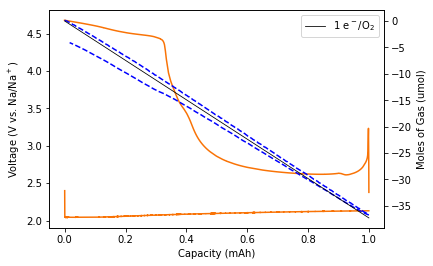

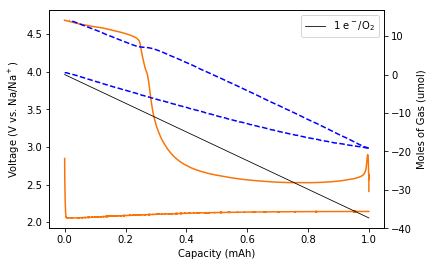

In [50]:
def plot_moles(discharge, charge, press, ch, c, cap0=None, leg=None):
    n=1
    i_dis= -1*np.mean(discharge['I/mA']) #find currents
    i_ch=np.mean(charge['I/mA'])
    print('discharge cap: ' + str(discharge['Capacity/mA.h'].iloc[-1])+ '  charge cap: ' + str(charge['Capacity/mA.h'].iloc[-1]) )
    temp = press['temperature/C'].mean()+273
    umoles = press['pressure/torr']/760*headspace(ch)/temp/0.082057
    umoles = umoles-umoles.iloc[0]
    
    cap=[]
    new=pd.concat([ discharge, charge], sort=True)
        
    for j in range(len(umoles)):  
        index=getnearpos( new['time/s'], press['time/s'].iloc[j])
        cap.append( new['Capacity/mA.h'].iloc[index] )
    
#     umoles_gas = pd.DataFrame(data=[umoles] ,columns='umoles')   
#     umoles_gas['Capacity/mA.h'] = cap
    
    
    if leg == None:
        leg=''
        
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=charge['time/s'].iloc[0]
    end2=charge['time/s'].iloc[-1]
    
    fig, ax=plt.subplots()       
    ax2=ax.twinx()
    ax.plot(discharge['Capacity/mA.h'], discharge['Ewe/V'], 'xkcd:orange', label=leg)
    ax.plot( 1-charge['Capacity/mA.h'], charge['Ewe/V'], 'xkcd:orange', label='')

    ax.set(xlabel='Capacity (mAh)', ylabel='Voltage (V vs. Na/Na$^+$)')
    ax2.set( ylabel='Moles of Gas (umol)')
    #ax2.yaxis.label.set_color('m')
    #ax.yaxis.label.set_color('blue')
    
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    x=[0,1]
    y=[0,-1*3.6/96485/n*10**6]
    
    disch_cap=(press['time/s']-press['time/s'].iloc[st_p1])*i_dis/3600
    char_cap=(press['time/s']-press['time/s'].iloc[st_p2])*i_ch/3600
    
    #print('total moles of gas evolved: ' + str(umoles_gas['umoles'].iloc[end_p2]-umoles.iloc[st_p2]))
    #ax2.plot(umoles_gas['Capacity/mA.h'][st_p1:end_p1], umoles_gas['umoles'][st_p1:end_p1])
    
    ax2.plot(disch_cap[st_p1:end_p1], (umoles[st_p1:end_p1]), color=c, linestyle='dashed', label=leg )
    ax2.plot(1-char_cap[st_p2:end_p2], (umoles-umoles.iloc[st_p2]+umoles.iloc[end_p1])[st_p2:end_p2], color=c, linestyle='dashed' , label='')
    
    ax2.plot(x,y, 'k', linewidth=0.8, label='1 e$^-$/O$_2$')
    ax2.legend()
    print(umoles[end_p1], umoles[st_p2])
    
    epermol_ds = -discharge['Capacity/mA.h'].iloc[-1]*3.6/n/96485/(umoles[end_p1]* 10**-6)
    epermol_ch = charge['Capacity/mA.h'].iloc[-1]*3.6/n/96485/((umoles[end_p2]-umoles[st_p2])*10**-6)
    print('electrons per oxygen on discharge: ' + str(epermol_ds))
    print('electrons per oxygen on charge: ' + str(epermol_ch))
    return ()

cycles_fold=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180731_sodiumchronoamp_2cycles_1mA_dems/')

cy2fold= [cycles_fold[5:8]]

cy1p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180731_sodiumchronoamp_2cycles_1mA_dems/180731_sodiumchronoamp_2cycles_1mA_dems_disch_c1_Ch1__2018-07-31_10.53_11.txt')
cy2p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180731_sodiumchronoamp_2cycles_1mA_dems/180731_sodiumchronoamp_2cycles_1mA_dems_disch_c2_Ch1__2018-07-31_16.08_26.txt')


#plot_moles(cycles_fold[13], cycles_fold[1], cy1p, 'dems1', 'blue', leg='cycle 1')
#plot_moles(cycles_fold[18], cycles_fold[1], cy2p, 'dems1', 'green', leg='cycle 2')

#plt.savefig('/Users/kedzie/Desktop/sodium discharge pressure 2 cycles.png', transparent = True, dpi=600, bbox_inches='tight')

cycles4= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180916_Na_cycling_chronopotentiometry_cell2/')
cyc_p1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180916_Na_cycling_chronopotentiometry_cell2/180916_Na_cycling_chronopotentiometry_cell2_cycle1_Ch5__2018-09-16_16.37_36.txt')


#plot_moles(cycles4[3],cycles4[5], cyc_p1, 5, 'blue', leg='cycle1')



# plt.figure()
# plt.plot(cycles4[3]['Capacity/mA.h'], cycles4[3]['Ewe/V'], label='cycle 1', color='xkcd:cerulean')
# plt.plot(1-cycles4[5]['Capacity/mA.h'], cycles4[5]['Ewe/V'], label='', color='xkcd:cerulean')

# plt.plot(cycles4[10]['Capacity/mA.h'], cycles4[10]['Ewe/V'], label='cycle 2', color='green')
# plt.plot(1-cycles4[12]['Capacity/mA.h'], cycles4[12]['Ewe/V'], label='', color='green')

# plt.plot(cycles4[17]['Capacity/mA.h'], cycles4[17]['Ewe/V'], label='cycle 3', color='xkcd:orange')
# plt.plot(1-cycles4[19]['Capacity/mA.h'], cycles4[19]['Ewe/V'], label='', color='xkcd:orange')

# plt.plot(cycles4[24]['Capacity/mA.h'], cycles4[24]['Ewe/V'], label='cycle 4', color='brown')
# plt.plot(1-cycles4[26]['Capacity/mA.h'][:-630], cycles4[26]['Ewe/V'][:-630], label='', color='brown')
# plt.legend()

#plt.savefig('/Users/kedzie/Desktop/chronopotentiometry control na study cell1.png', transparent = True, dpi=500, bbox_inches='tight')



cy1f=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190110_Na_slowdischarge_010mA_P50/')
p2=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190110_Na_slowdischarge_010mA_P50/190110_Na_slowdischarge_010mA_P50_p_Ch4__2019-01-10_14.31_49.txt')
plot_moles(cy1f[1],cy1f[3], p2, 4, 'blue')
#plt.savefig('/Users/kedzie/Desktop/slow discharge p50.png', transparent = True, dpi=500, bbox_inches='tight')




xc72f=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190110_Na_slowdischarge_010mA_xc72/')
xcp=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190110_Na_slowdischarge_010mA_xc72/190110_Na_slowdischarge_010mA_xc72_p_Ch5__2019-01-10_14.32_13.txt')


#plt.savefig('/Users/kedzie/Desktop/slow discharge cathode study.png', transparent = True, dpi=500, bbox_inches='tight')

#plot_moles(xc72f[1],xc72f[3], xcp, 5, 'blue')

#plt.savefig('/Users/kedzie/Desktop/slow discharge xc72.png', transparent = True, dpi=500, bbox_inches='tight')




In [4]:



def plot_CA(chronoamp, press, ch, c, leg=None, cap0=None, mol0=None):
    if cap0==None:
        cap0=0
    if mol0==None:
        mol0=0
    if leg ==None:
        leg=''
        
    #match up times from ecLab file with times in pressure file to make a new array of pressures    
    new_p=[]
    temp =[]
    for i in range(len(chronoamp)):
        dex = getnearpos(press['time/s'], chronoamp['time/s'].iloc[i])
        new_p.append(press['pressure/torr'].iloc[dex])
        temp.append(press['temperature/C'].iloc[dex]+273)
    
    umoles = (new_p-new_p[0])/760*headspace(ch)/temp/0.082057
    
    time0 = chronoamp['time/s'].iloc[0]
    time_end = chronoamp['time/s'].iloc[-1]
    
    st = getnearpos(press['time/s'], time0)
    end = getnearpos(press['time/s'],time_end)
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    
    ax.plot((chronoamp['Capacity/mA.h']+cap0), chronoamp['I/mA'], c, label=leg)
        
    ax.set(xlabel='Capacity (mAh)', ylabel='Current (mA)')
    ax2.set(xlabel='Capacity (mAh)', ylabel='Moles of Gas ($\mu$mol)')
    ax2.yaxis.label.set_color('green')
    #ax.yaxis.label.set_color('blue')
    
    x=[cap0,1]
    y=[(cap0*3.6/96485*10**6),37.3]
    ax2.plot(x,y, 'k-', label='')
    
    
#     ax2.plot(cap0+chronoamp['Capacity/mA.h'], (umoles+mol0), c ,linestyle='dashed' , label=leg)    
    #ax2.set_ylim([24,38])
    #ax2.set_xlim([0.68,1.02])
    
    #ax2.legend(loc='upper left')
    #ax2.legend()
    
    #print(cap0+chronoamp['Capacity/mA.h'].iloc[-1])
    en= umoles[-1]+mol0
    return (en)


d_na1=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180426_Na_CA_1/')
# pr1=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180426_Na_CA_1/180426_Na_CA_1_p_Ch1.txt')


# d_na2=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180426_Na_CA_2/')
# pr2=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180426_Na_CA_2/180426_Na_CA_2_p_Ch2.txt')

#plot_na_CA(d_na1[3],d_na1[6], d_na1[7],d_na1[8],pr1, 1, 'orange')
#plot_moles_CA(d_na2[3],d_na2[6], d_na2[7],d_na2[8],pr2, 5, 'orange')

so28=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_2.8V_cell1/')
# so28_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_2.8V_cell1/180621_Na_CA_2.8V_cell1_p_Ch3__2018-06-21_11.20_27.txt')
#plot_na_CA(so28[3], so28[6], so28[7], so28[8], so28_p, 3, 'xkcd:cerulean' )

so35=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_3.5V_cell1/')
# so35_p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_3.5V_cell1/180621_Na_CA_3.5V_cell1_Ch5__2018-06-21_11.23_00.txt')
#plot_na_CA(so35[3], so35[6], so35[7], so35[8], so35_p, 5, 'xkcd:cerulean' )

chronoampli=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180618_LiNO3LiTFSI_chronoamp1/')
chronop= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180618_LiNO3LiTFSI_chronoamp1/180618_LiNO3LiTFSI_chronoamp1_p_Ch3__2018-06-18_17.30_58.txt')

#plot_na_CA(chronoampli[3], chronoampli[5],chronoampli[6], chronoampli[7], chronop, 3, 'xkcd:cerulean' )
#plt.savefig('/Users/kedzie/Desktop/lithium nitrate chronoamp1.png', transparent = True, dpi=600, bbox_inches='tight')

chro1 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180619_LiNO3_chronoamp_3.8V/')
chro1_p =read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180619_LiNO3_chronoamp_3.8V/180619_LiNO3_chronoamp_3.8V_p_Ch4__2018-06-19_18.37_10.txt')

#plot_li_CA(chro1[2], chro1[4], chro1[5], chro1_p, 4, 'xkcd:cerulean' )
#plt.savefig('/Users/kedzie/Desktop/lino3 3.8V CA.png', transparent = True, dpi=600, bbox_inches='tight')

chro2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180619_LiTFSI_chronoamp_3.8V/')
chro2_p =read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180619_LiTFSI_chronoamp_3.8V/180619_LiTFSI_chronoamp_3.8V_Ch5__2018-06-19_18.39_58.txt')

plot_li_CA(chro2[2], chro2[4], chro2[5], chro2_p, 5, 'xkcd:cerulean' )
#plt.savefig('/Users/kedzie/Desktop/litfsi 3.8V CA.png', transparent = True, dpi=600, bbox_inches='tight')

dems_disch= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180709_sodium_chronoamp_3V_DEMS_2/')
disch_pres= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180709_sodium_chronoamp_3V_DEMS_2/180709_sodium_chronoamp_3V_DEMS_2_disch_Ch1__2018-07-09_16.56_43.txt')

#plt.figure()
# plt.plot(disch_pres['time/s'], disch_pres['pressure/torr'])
#plot_na_CA(dems_disch[8], dems_disch[1], dems_disch[2], dems_disch[3], disch_pres, ch= 'dems1', c='xkcd:cerulean' )


#plot_moles(dems_disch[8], dems_disch[1], disch_pres, 'dems1', 'b')


NameError: name 'folder_files' is not defined

In [5]:
titrate=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180319_Na_titration/')
titrate_nabr=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180319_Na_NaBr_titration/')

tp = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180319_Na_titration/180319_Na_titration_p_Ch5.txt')
tp_nabr = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180319_Na_NaBr_titration/180319_Na_NaBr_titration_p_Ch3.txt')

i=2


temp = tp['temperature/C'].mean()+273
umoles = tp['pressure/torr']/760*headspace(5)/temp/0.082057
umoles=umoles-umoles.iloc[0]

st1= titrate[1]['time/s'].iloc[0]
end1= titrate[1]['time/s'].iloc[-1]

st_p1 = getnearpos(tp['time/s'],st1)
end_p1 = getnearpos(tp['time/s'],end1)


#volume2=channel_vol(3)+cell_vol-elyte

temp2 = tp_nabr['temperature/C'].mean()+273
umoles2 = tp_nabr['pressure/torr']/760*headspace(3)/temp2/0.082057
umoles2=umoles2-umoles2.iloc[0]

nst1= titrate_nabr[1]['time/s'].iloc[0]
nend1= titrate_nabr[1]['time/s'].iloc[-1]

nst_p1 = getnearpos(tp_nabr['time/s'],nst1)
nend_p1 = getnearpos(tp_nabr['time/s'],nend1)


x=[0,1]
y=[0,(1*3.6/96485*10**6)]

disch_cap=(tp['time/s']-tp['time/s'].iloc[st_p1])*i/3600

disch_cap2=(tp_nabr['time/s']-tp_nabr['time/s'].iloc[nst_p1])*i/3600


fig, ax= plt.subplots()
ax2=ax.twinx()

ax2.set( ylabel='Moles of Gas (umol)')
ax.set(xlabel= 'Capacity (mAh)', ylabel='Potential (V vs. Na/Na$^+$)')

ax.plot(titrate[1]['Capacity/mA.h'], titrate[1]['Ewe/V'], 'b', label='standard cell')
ax.plot(titrate_nabr[1]['Capacity/mA.h'], titrate_nabr[1]['Ewe/V'], 'g', label='cell with NaBr')


ax2.plot(disch_cap[st_p1:end_p1], (umoles[st_p1]-umoles[st_p1:end_p1]),'b--' )
ax2.plot(disch_cap2[nst_p1:nend_p1], -(umoles2[nst_p1:nend_p1]),'g--' )


ax2.plot(x,y, 'k', linewidth=0.8, label='')
ax.legend(loc='upper left')

#plt.savefig('/Users/kedzie/Desktop/sodium titration.png', transparent = True, dpi=600, bbox_inches='tight')


NameError: name 'folder_files' is not defined

NameError: name 'd_na4' is not defined

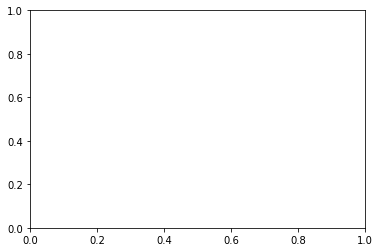

In [6]:

fig, ax2=plt.subplots()

a=plot_CA(d_na4[4], pr4, c='b', ch=2 , leg= 'cell 3')
b=plot_CA(d_na3[4], pr3, c='g', ch=1 , leg= 'NaBr cell 3')
#plt.savefig('/Users/kedzie/Desktop/cells3.png', transparent = True, dpi=600, bbox_inches='tight')

plt.show()

print(a,b)


<h1 style="color:DodgerBlue;">Script to Plot CV Data </h1>

In [7]:
from matplotlib import rcParams as rc
rc['mathtext.default'] = 'regular'

save1='off'
save2='off'

n1=read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_1MLiTFSI_DME_P50_underAr/180302_1MLiTFSI_DME_P50_underAr_02_CV_C03.mpt')
#n2=read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/')
cv_list=[n1]

scan=['10mV/s']

plot_cv(cv_list,scan)

plt.title('CV of 0.5M Li$NO_3$ 0.5M LiTFSI in DME')

if save1 == 'on':
    plt.savefig('/Users/kedzie/Desktop/CV under Ar.png', transparent = True, dpi=500, bbox_inches='tight')
plt.show()

#-------------------------------SECOND FIGURE----------------------------------------------

#plt.figure()
#a1=read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_P50_Li_1MLiTFSI_DME/180302_P50_Li_1MLiTFSI_DME_03_CV_C04.mpt')
#a2=read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_P50_Li_1MLiTFSI_DME_1mVs/180302_P50_Li_1MLiTFSI_DME_1mVs_03_CV_C04.mpt')

#lst=[a1,a2]
#sc=['10mV/s','1mV/s']
#plot_cv(lst,sc)
#plt.title('CV for 1M LiTFSI in DME under O2')
#if save2=='on':
#    plt.savefig('/Users/kedzie/Desktop/CV under O2.png', transparent = True, dpi=500, bbox_inches='tight')

#plt.show()


NameError: name 'read_data' is not defined

In [8]:
#ocv plots and cyclic voltammetry

ocv = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_1MLiTFSI_DME_P50_underAr/180302_1MLiTFSI_DME_P50_underAr_01_OCV_C03.mpt')
cv1 = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_1MLiTFSI_DME_P50_underAr/180302_1MLiTFSI_DME_P50_underAr_02_CV_C03.mpt')
ocv2 = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_1MLiTFSI_DME_P50_underAr/180302_1MLiTFSI_DME_P50_underAr_1mVs_01_OCV_C03.mpt')

#cv3 = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180216_1MLiTFSI_0.01MDMeOEPT_CV/180216_1MLiTFSI_0_04_CV_C01.mpt')
#cv4 = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180216_1MLiTFSI_0.01MDMeOEPT_CV/180216_1MLiTFSI_0_05_CV_C01.mpt')
#ocv2 = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180216_1MLiTFSI_0.01MDMeOEPT_CV/180216_1MLiTFSI_0_06_OCV_C01.mpt')

#make a list of the time values and scale so time starts at 0s

#time2 = ocv2['time/s']-ocv2['time/s'].iloc[0]+ocv['time/s'].iloc[-1] 

plt.figure()

plt.plot(ocv['time/s'], ocv['Ewe/V'])
plt.plot(ocv2['time/s'], ocv2['Ewe/V'])

ax = plt.gca()
ax.legend(['10mV/s scan rate','1mV/s scan rate'])


#plt.plot(cv1['time/s'],cv1['Ewe/V'])
#plt.plot(time2,ocv2['Ewe/V'])


ax.set(xlabel='Time (s)', ylabel='Voltage (V)')

#plt.savefig('/Users/ekedz/Desktop/RM_OCV1.png', transparent = True, dpi=500, bbox_inches='tight')


#plt.figure()
#plt.plot(cv1['Ewe/V'],cv1['<I>/mA'], color='b')
#plt.title('CV for Li-O2 with 0.01M DMeOEPT and 1M LiTFSI in PC')
#ax = plt.gca()      
#ax.set(xlabel='Voltage (V)', ylabel='Current (mA)')
#plt.savefig('/Users/ekedz/Desktop/RM_CV1.png', transparent = True, dpi=500, bbox_inches='tight')


#plt.plot(cv2['Ewe/V'],cv2['<I>/mA'], 'r--')
#ax.legend(['1mV/s forward', '1mV/s reverse', '10mV/s forward', '10mV/s reverse']) 

#plt.savefig('/Users/ekedz/Desktop/RM_first scan rate.png', transparent = True, dpi=500, bbox_inches='tight')

#plt.figure()

#plt.plot(cv3['Ewe/V'],cv3['<I>/mA'], color='g')
#plt.plot(cv4['Ewe/V'],cv4['<I>/mA'], 'm--')
#ax = plt.gca()      
#ax.set(xlabel='Voltage (V)', ylabel='Current (mA)')
#ax.legend(['10mV/s forward', '10mV/s reverse']) 
#plt.savefig('/Users/ekedz/Desktop/RM_CVs_second scan rate.png', transparent = True, dpi=500, bbox_inches='tight')
#('CV with 1 mV/s scan rate from 4.25V to 2.5V')

  #cycle = num_cycles(cv1)

    #for i in range(1,cycle+1):
        #df = cv1.iloc[np.isclose(cv1['cycle number'], i)]
        #plt.figure()
        #df.plot( 'Ewe/V','<I>/mA')
        #ax = plt.gca()
        #ax.set(xlabel='Voltage (V)', ylabel='Current (mA)')
        #ax.legend(['Run number {}'.format(i)])
        #plt.show()
        
#plt.show()

NameError: name 'read_data' is not defined

In [9]:
#read pressure data file
press='/Users/kedzie/Documents/Berkeley/Research/Data/2018/180221_Na_2mAds_2mAch_C01/180221_Na_2mAds_2mAch_C01.txt'
df_press = pd.read_csv(press, sep ='\t', names =['time (min)','voltage (V)', 'current (mA)', 'pressure (torr)','temperature (C)'])

ecLab1 = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180221_Na_2mAds_2mAch_C01/180221_Na_2mAds_2mAch_02_OCV_C01.mpt')
ecLab2 = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180221_Na_2mAds_2mAch_C01/180221_Na_2mAds_2mAch_03_PEIS_C01.mpt')
discharge = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180221_Na_2mAds_2mAch_C01/180221_Na_2mAds_2mAch_04_CP_C01.mpt')
ecLab4 = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180221_Na_2mAds_2mAch_C01/180221_Na_2mAds_2mAch_05_OCV_C01.mpt')
charge = read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180221_Na_2mAds_2mAch_C01/180221_Na_2mAds_2mAch_06_CP_C01.mpt')


#normalize times of both dataframes
ec_start=ecLab1['time/s'].iloc[0]
t_norm_press = (df_press['time (min)']-df_press['time (min)'].iloc[0])*60-ec_start

tim=ecLab1['time/s'].iloc[0]
plt.figure()
#plt.plot(ecLab['time/s'],ecLab['Ewe/V'])

fig, ax = plt.subplots(figsize=(12,8))

#fig = figure(figsize=(6, 4), dpi=120, facecolor='w', edgecolor='k')
ax2=ax.twinx()

ax.set(xlabel='Time(s)', ylabel='Voltage (V)')
ax2.set(ylabel='Pressure (torr)')
ax2.yaxis.label.set_color('b')
ax.yaxis.label.set_color('r')

#for i in range (position1, position2):
 #   q=getnearpos(df_press[i]['time (min)'],discharge['time/s'])
    
#normalizes the pressure time by subtracting the time charge starts into hours and mulitplies by 2mAh to get capacity

Qc=(df_press['time (min)']-(charge['time/s'].iloc[0]-ec_start)/60)/60*2
Qd=(df_press['time (min)']-(discharge['time/s'].iloc[0]-ec_start)/60)/60*2


ax.plot(ecLab1['time/s']-ec_start,ecLab1['Ewe/V'], 'r-')
ax.plot((ecLab2['time/s']-ec_start),ecLab2['<Ewe>/V'],'r')
ax.plot((discharge['time/s']-ec_start),discharge['Ewe/V'],'r')
ax.plot((ecLab4['time/s']-ec_start),ecLab4['Ewe/V'],'r')
ax.plot((charge['time/s']-ec_start),charge['Ewe/V'],'r')

ax2.plot(t_norm_press[:150],df_press['pressure (torr)'][:150], 'b-')

start1=discharge['time/s'].iloc[0]
end1=discharge['time/s'].iloc[-1]
position1=getnearpos(t_norm_press, start1)
position2=getnearpos(t_norm_press, end1)

start2=charge['time/s'].iloc[0]
end2=charge['time/s'].iloc[-1]

position3=getnearpos(t_norm_press, start2)
position4=getnearpos(t_norm_press, end2)


fig, ax3=plt.subplots(figsize=(12,8))
ax4=ax3.twinx()

ax3.set(xlabel='Time(s)', ylabel='Voltage (V)')
ax4.set(ylabel='Pressure (torr)')

ax4.yaxis.label.set_color('b')
ax3.yaxis.label.set_color('r')

ax3.plot(discharge['time/s']-ec_start,discharge['Ewe/V'], 'r-')
ax4.plot(t_norm_press[position1:position2]-ec_start,df_press['pressure (torr)'][position1:position2], 'b--')

ax3.plot(charge['time/s']-ec_start-charge['time/s'].iloc[0]+discharge['time/s'].iloc[-1],charge['Ewe/V'], 'r-')
ax4.plot(t_norm_press[position3:position4]-ec_start-charge['time/s'].iloc[0]+discharge['time/s'].iloc[-1],df_press['pressure (torr)'][position3:position4], 'b--')

plt.show()

 

NameError: name 'read_data' is not defined

In [11]:



plt.figure()

plt.plot(abs(discharge['I/mA']*(discharge['time/s']-start1)/3600),discharge['Ewe/V'])
plt.plot(q,charge['Ewe/V'])

plt.xlabel('Q (mAh)', fontsize=14)
plt.ylabel('Voltage (V vs. Na/Na+)',fontsize=14)
plt.title('Na-O2 battery charge and discharge: 0.5M NaOTF in DME', fontsize=14, fontweight='bold')

import pylab as P
P.subplot(111)
# P.arrow( x, y, dx, dy, **kwargs )
P.arrow( 0.4, 1.9, 0.2, 0, fc="k", ec="k", head_width=0.15, head_length=0.04 )
P.arrow(0.65,2.85, -0.2, 0, fc='k', ec='k', head_width=0.15, head_length=0.04 )

#plt.savefig('/Users/kedzie/Desktop/Na cycling.png', transparent = True, dpi=500, bbox_inches='tight')
P.show()

ch1_vol=1656.5
cell_vol=422.5
elyte= 80 
volume=ch1_vol+cell_vol-elyte

temp=df_press['temperature (C)'].mean()+273
umoles=df_press['pressure (torr)']/760*volume/(temp)/0.082057
plot_umol=umoles[position3:position4]-umoles[position3]
plot_umol=plot_umol[::-1]

plot_dis=umoles[position1:position2]-umoles[position2]

fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.set_xlabel('Q (mAh)', color='k', fontsize=14)
ax1.set_ylabel('Voltage (V vs. Li/Li+)', color='b', fontsize=14)
ax2.set_ylabel('Moles of Gas (umol)', color='g', fontsize=14)

ax1.plot(abs(discharge['I/mA']*(discharge['time/s']-start1)/3600),discharge['Ewe/V'],'b')
ax1.plot(q,charge['Ewe/V'], 'b')

ax2.plot(Qc[position3:position4],plot_umol, 'g--')
ax2.plot(Qd[position1:position2],plot_dis, 'g--')
plt.title('Na-O2 battery charge and discharge: 0.5M NaOTF in DME', fontsize=14, fontweight='bold')
plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2018/Na cycling.png', transparent = True, dpi=500, bbox_inches='tight')

NameError: name 'discharge' is not defined

<Figure size 432x288 with 0 Axes>

In [29]:
df_press= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_Li_P50_1MLiTFSI_DME_cycle_underO2/180302_Li_P50_1MLiTFSI_DME_cycle_underO2_Ch1__2018-03-02_18.03_52.txt')
ocv=read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_Li_P50_1MLiTFSI_DME_cycle_underO2/180302_Li_P50_1MLiTFSI_DME_cycle_underO2_02_OCV_C01.mpt')
cp= read_data('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_Li_P50_1MLiTFSI_DME_cycle_underO2/180302_Li_P50_1MLiTFSI_DME_cycle_underO2_03_CP_C01.mpt')

#normalize times of both dataframes
ocv['time/s']=ocv['time/s'] - ocv['time/s'].iloc[0]
cp['time/s']= cp['time/s'] - ocv['time/s'].iloc[0]
df_press['time/s']=df_press['time/s']-df_press['time/s'].iloc[0]


#for i in range (position1, position2):
#q=getnearpos(df_press[i]['time (min)'],discharge['time/s'])

#normalizes the pressure time by subtracting the time charge starts into hours and mulitplies by the mAh value to get capacity
charge = cp[3261:]
charge['time/s']=charge['time/s']-charge['time/s'].iloc[0]
discharge=cp[:3261]

print(discharge.head())
Qd=df_press['time/s']/3600*0.565
Qc=df_press['time/s']/3600*0.283
Qed=(discharge['time/s']-discharge['time/s'].iloc[0])/3600*discharge['I/mA']
Qec=(charge['time/s']-charge['time/s'].iloc[0])/3600*charge['I/mA']

plt.plot(-Qed,discharge['Ewe/V'])
plt.plot(Qec,charge['Ewe/V'])


ch1_vol=1656.5
cell_vol=422.5
elyte= 80 
volume=ch1_vol+cell_vol-elyte

umoles=df_press['pressure/torr']/760*volume/(df_press['temperature/C'].mean()+273)/0.082057

plot_umol=umoles[:3261]
plot_umol=plot_umol[::-1]

plot_dis=umoles[position1:position2]-umoles[position2]


fig, ax1=plt.subplots()
#ax2=ax1.twinx()
ax1.set_xlabel('Q (mAh)', color='k', fontsize=14)
ax1.set_ylabel('Voltage (V vs. Li/Li+)', color='b', fontsize=14)
#ax2.set_ylabel('Moles of Gas (umol)', color='g', fontsize=14)

ax1.plot(abs(Qed),discharge['Ewe/V'], color='b')
ax1.plot(abs(Qed.iloc[-1])-Qec,charge['Ewe/V'], color='b')

#ax2.plot(Qc[position3:position4],plot_umol, color='g')
#ax2.plot(Qd[position1:position2],plot_dis, color='g')
plt.title('Li-O2 battery: 1M LiTFSI in DME', fontsize=14, fontweight='bold')
#plt.legend('-0.56mA', '0.283mA')
#plt.savefig('/Users/kedzie/Desktop/Li cycling.png', transparent = True, dpi=500, bbox_inches='tight')

plt.show()


'''


ax2.plot(t_norm_press[:150],df_press['pressure (torr)'][:150], 'b-')

start1=cp['time/s'].iloc[0]
end1=cp['time/s'].iloc[-1]
position1=getnearpos(df_press, start1)
position2=getnearpos(df_press, end1)

start2=charge['time/s'].iloc[0]
end2=charge['time/s'].iloc[-1]

position3=getnearpos(t_norm_press, start2)
position4=getnearpos(t_norm_press, end2)


fig, ax3=plt.subplots(figsize=(12,8))
ax4=ax3.twinx()

ax3.set(xlabel='Time(s)', ylabel='Voltage (V)')
ax4.set(ylabel='Pressure (torr)')

ax4.yaxis.label.set_color('b')
ax3.yaxis.label.set_color('r')

ax3.plot(discharge['time/s']-ec_start,discharge['Ewe/V'], 'r-')
ax4.plot(t_norm_press[position1:position2]-ec_start,df_press['pressure (torr)'][position1:position2], 'b-')

ax3.plot(charge['time/s']-ec_start-charge['time/s'].iloc[0]+discharge['time/s'].iloc[-1],charge['Ewe/V'], 'r-')
ax4.plot(t_norm_press[position3:position4]-ec_start-charge['time/s'].iloc[0]+discharge['time/s'].iloc[-1],df_press['pressure (torr)'][position3:position4], 'b-')

plt.show()



'''

FileNotFoundError: File b'/Users/kedzie/Documents/Berkeley/Research/Data/2018/180302_Li_P50_1MLiTFSI_DME_cycle_underO2/180302_Li_P50_1MLiTFSI_DME_cycle_underO2_Ch1__2018-03-02_18.03_52.txt' does not exist